# ANALYSIS OF CHATGPT'S POLITICAL LEAN

Now, we can analyze our classifier's predictions of ChatGPT's political lean. Let's remember what our hypotheses are, so we can perform meaningful analysis:

# Hypotheses
1. ChatGPT will defer to “facts” and be “moderate” or “neutral” for many topics, especially for those that are less politically contentious (i.e. natural disasters)
2. ChatGPT will have a slight left-leaning for more highly contentious US-based news topics or issues–especially if asked to elaborate
3. For international news and conflict, ChatGPT will be pro-American / pro-West which we will equate to a right-leaning slant


First, we can import the results files that we saved in our classification document.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

natural_df = pd.read_csv('/content/results_natural_df - results_natural_df (1).csv')
summary_df = pd.read_csv('/content/results_summary_df - results_summary_df (1).csv')
detailed_df = pd.read_csv('/content/results_detailed_df - results_detailed_df (1).csv')

In [ ]:
# natural_df.head()

In [ ]:
# summary_df.head()

In [ ]:
# detailed_df.head()

Please note that there are (manually flagged) binaries applied to the following topics:

1. "contentious" (0=no, 1=yes) refers to whether or not we flagged something as more often than not being polarized between right and left ideologies. An example of a polarized (contentious=1) topic would be anything related to gun laws.
2. "international" (0=no, 1=yes) refers to if the topic is affiliated with international **relations**. Some topics, like the Olympics, will be flagged as 0 even though they are international events, because the primary discourse around the Olypics is not politically charged.

Let's summarize the number of polarized and international topics that we have in total for each prompt.

In [ ]:
# Summaries of all
natural_contentious = natural_df['contentious'].sum()
summary_contentious = summary_df['contentious'].sum()
detailed_contentious = detailed_df['contentious'].sum()
natural_international = natural_df['international'].sum()
summary_international = summary_df['international'].sum()
detailed_international = detailed_df['international_relations'].sum()

Print those results.

In [ ]:
print('Natural Contentious:',natural_contentious)
print('Summary Contentious:',summary_contentious)
print('Detail Contentious:',detailed_contentious)
print('Natural International:',natural_international)
print('Summary International:',summary_international)
print('Detail International:',detailed_international)

Natural Contentious: 27
Summary Contentious: 26
Detail Contentious: 16
Natural International: 14
Summary International: 13
Detail International: 6


Now, we can see how many polarized topics are affiliated with each predicted political affiliation (left, moderate, right). We will do this for each prompting style.

1. Natural prompting style, polarized topics -> counts for political predictions (left, moderate, right)

In [ ]:
# Natural contentious vs. natural non-contentious for different labels

nat_con_cont = natural_df[natural_df['label'] == 'conservative']['contentious'].sum()
nat_lib_cont = natural_df[natural_df['label'] == 'liberal']['contentious'].sum()
nat_mod_cont = natural_df[natural_df['label'] == 'moderate']['contentious'].sum()

In [ ]:
print('Naturally prompted contentious topics -> conservative label:',nat_con_cont)
print('Naturally prompted contentious topics -> liberal label:',nat_lib_cont)
print('Naturally prompted contentious topics -> moderate label:',nat_mod_cont)


Naturally prompted contentious topics -> conservative label: 12
Naturally prompted contentious topics -> liberal label: 10
Naturally prompted contentious topics -> moderate label: 5


2. Summary prompting style, polarized topics -> counts for political predictions (left, moderate, right)

In [ ]:
# Summary contentious vs. Summary non-contentious for different labels

sum_con_cont = summary_df[summary_df['label'] == 'conservative']['contentious'].sum()
sum_lib_cont = summary_df[summary_df['label'] == 'liberal']['contentious'].sum()
sum_mod_cont = summary_df[summary_df['label'] == 'moderate']['contentious'].sum()

In [ ]:
print('Summary prompted contentious topics -> conservative label:',sum_con_cont)
print('Summary prompted contentious topics -> liberal label:',sum_lib_cont)
print('Summary prompted contentious topics -> moderate label:',sum_mod_cont)


Summary prompted contentious topics -> conservative label: 3
Summary prompted contentious topics -> liberal label: 11
Summary prompted contentious topics -> moderate label: 12


3. Detailed prompting style, polarized topics -> counts for political predictions (left, moderate, right)

In [ ]:
# Detailed contentious vs. Detailed non-contentious for different labels

det_con_cont = detailed_df[detailed_df['label'] == 'conservative']['contentious'].sum()
det_lib_cont = detailed_df[detailed_df['label'] == 'liberal']['contentious'].sum()
det_mod_cont = detailed_df[detailed_df['label'] == 'moderate']['contentious'].sum()

In [ ]:
print('Detailed prompted contentious topics -> conservative label:',det_con_cont)
print('Detailed prompted contentious topics -> liberal label:',det_lib_cont)
print('Detailed prompted contentious topics -> moderate label:',det_mod_cont)

Detailed prompted contentious topics -> conservative label: 5
Detailed prompted contentious topics -> liberal label: 9
Detailed prompted contentious topics -> moderate label: 2


Now, let's do the same for the internationally flagged topics:

1. Natural prompting style, international topics -> counts for political predictions (left, moderate, right)

In [ ]:
# Natural local vs. natural international for different labels

nat_con_int = natural_df[natural_df['label'] == 'conservative']['international'].sum()
nat_lib_int = natural_df[natural_df['label'] == 'liberal']['international'].sum()
nat_mod_int = natural_df[natural_df['label'] == 'moderate']['international'].sum()

In [ ]:
print('Naturally prompted international topics -> conservative label:',nat_con_int)
print('Naturally prompted international topics -> liberal label:',nat_lib_int)
print('Naturally prompted international topics -> moderate label:',nat_mod_int)

Naturally prompted international topics -> conservative label: 8
Naturally prompted international topics -> liberal label: 4
Naturally prompted international topics -> moderate label: 2


2. Summary prompting style, international topics -> counts for political predictions (left, moderate, right)

In [ ]:
# Summary local vs. Summary international for different labels

sum_con_int = summary_df[summary_df['label'] == 'conservative']['international'].sum()
sum_lib_int = summary_df[summary_df['label'] == 'liberal']['international'].sum()
sum_mod_int = summary_df[summary_df['label'] == 'moderate']['international'].sum()

In [ ]:
print('Summary prompted international topics -> conservative label:',sum_con_int)
print('Summary prompted international topics -> liberal label:',sum_lib_int)
print('Summary prompted international topics -> moderate label:',sum_mod_int)


Summary prompted international topics -> conservative label: 2
Summary prompted international topics -> liberal label: 5
Summary prompted international topics -> moderate label: 6


3. Detailed prompting style, international topics -> counts for political predictions (left, moderate, right)

In [ ]:
# Detailed local vs. Detailed international for different labels

det_con_int = detailed_df[detailed_df['label'] == 'conservative']['international_relations'].sum()
det_lib_int = detailed_df[detailed_df['label'] == 'liberal']['international_relations'].sum()
det_mod_int = detailed_df[detailed_df['label'] == 'moderate']['international_relations'].sum()

In [ ]:
print('Detailed prompted international topics -> conservative label:',det_con_int)
print('Detailed prompted international topics -> liberal label:',det_lib_int)
print('Detailed prompted international topics -> moderate label:',det_mod_int)

Detailed prompted international topics -> conservative label: 3
Detailed prompted international topics -> liberal label: 3
Detailed prompted international topics -> moderate label: 0


## Now, we can build histograms that represent our findings ->

In [ ]:
# Build a histogram that represents polarized topics:

First, let's pull in our data and be sure to label each row with its affiliated prompting style ...

In [ ]:
natural_df_clean = natural_df.loc[:,['label','contentious','international']]
natural_df_clean['category']='natural'

In [ ]:
# natural_df_clean.tail()

In [ ]:
summary_df_clean = summary_df.loc[:,['label','contentious','international']]
summary_df_clean['category']='summary'

In [ ]:
# summary_df_clean.head()

In [ ]:
detail_df_clean = detailed_df.loc[:,['label','contentious','international_relations']]
detail_df_clean['category']='detail'

In [ ]:
# detail_df_clean.tail()

We misnamed our .csv ... let's follow pandas documentation to rename ... https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

In [ ]:
# Rename misnomer "international_relations" -> "international"
detail_df_clean = detail_df_clean.rename(columns={"international_relations":"international"})

In [ ]:
detail_df_clean.head()

,label,contentious,international,category
0,moderate,0,0,detail
1,conservative,0,0,detail
2,moderate,0,0,detail
3,moderate,0,0,detail
4,moderate,0,0,detail


Now that each row has been properly labeled for its category, we can combine all the rows to make a single dataframe.

In [ ]:
combined_df = pd.concat([natural_df_clean, summary_df_clean, detail_df_clean], ignore_index=True)

In [ ]:
combined_df.head()

,label,contentious,international,category
0,liberal,0,0,natural
1,liberal,0,0,natural
2,moderate,0,0,natural
3,moderate,0,0,natural
4,liberal,0,0,natural


In [ ]:
len(natural_df_clean)

48

In [ ]:
len(summary_df_clean)

46

In [ ]:
len(detail_df_clean)

36

In [ ]:
len(combined_df)

130

Now, let's import the libraries necessary to plot our data:

In [ ]:
import matplotlib as plt
import seaborn as sns

Let's first make a visualization that represents label counts for each prompt type. Our X will equal 'category' (because that's the count of prompt types) and our huge (which breaks counts into three separate categories) will be set as "label." We need multiple = 'dodge' because that will place the bars next to each other. Finally, we shrink our plot slightly to fit, and add a title.

Reference: https://seaborn.pydata.org/generated/seaborn.histplot.html

[Text(0.5, 1.0, 'Counts of Political Labels for All Topics and Prompting Styles')]

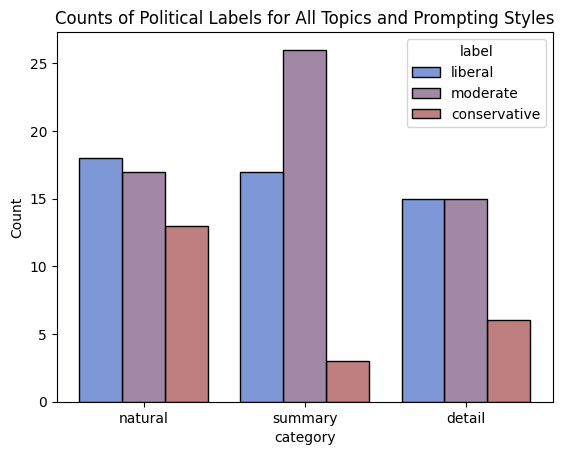

In [ ]:
# Graph for all prompting styles, all topics
label_colors = {'liberal':'#5175ca','conservative':'#aa5456','moderate':'#826289'}
palette = [label_colors[label] for label in combined_df['label'].unique()] # one label color per label for each type of label
sns.set_palette(palette)

sns.histplot(data=combined_df,x='category',hue="label", multiple='dodge',shrink=.8).set(title="Counts of Political Labels for All Topics and Prompting Styles")

Now, let's create a graphical representation of the "contentious" data. First, we will mask our data to only include counts for polarized topics.

Reference: https://www.geeksforgeeks.org/how-to-select-rows-from-a-dataframe-based-on-column-values/

In [ ]:
combined_df.head()

,label,contentious,international,category
0,liberal,0,0,natural
1,liberal,0,0,natural
2,moderate,0,0,natural
3,moderate,0,0,natural
4,liberal,0,0,natural


In [ ]:
type(combined_df['contentious'].iloc[1])

numpy.int64

In [ ]:
mask = combined_df['contentious'] == 1
polarized_df = pd.DataFrame(combined_df[mask])

In [ ]:
polarized_df.head()

,label,contentious,international,category
5,conservative,1,0,natural
6,conservative,1,1,natural
7,moderate,1,0,natural
13,conservative,1,1,natural
15,liberal,1,0,natural


In [ ]:
len(polarized_df)

69

Following this tutorial, we will sort the labels in such a way that we can properly apply our color palette.

https://stackoverflow.com/questions/23482668/sorting-by-a-custom-list-in-pandas

In [ ]:
# Sort the labels so they can be converted properly to palettes and stay in the right order
# We also have to do it for our category

# Set preferred order
sorter = ['liberal', 'moderate', 'conservative']
category_sorter = ['natural', 'sumamry', 'detail']

# Create a dictionary mapping
sorterIndex = dict(zip(sorter, range(3)))
categoryIndex = dict(zip(category_sorter, range(3)))

# Apply sorting
polarized_df["sorter_rank"] = polarized_df["label"].map(sorterIndex)
polarized_df["category_sorter_rank"] = polarized_df["category"].map(categoryIndex)

polarized_df.sort_values(["category_sorter_rank", "sorter_rank",], ascending= True, inplace= True)

In [ ]:
polarized_df.head()

,label,contentious,international,category,sorter_rank,category_sorter_rank,category_sorter_rank
43,liberal,1,1,natural,0,0.0,0.0
45,liberal,1,0,natural,0,0.0,0.0
38,liberal,1,1,natural,0,0.0,0.0
15,liberal,1,0,natural,0,0.0,0.0
16,liberal,1,0,natural,0,0.0,0.0


In [ ]:
polarized_df["label"].value_counts()

liberal         30
conservative    20
moderate        19
Name: label, dtype: int64

In [ ]:
# We need to repeat the process

[Text(0.5, 1.0, 'Counts of Political Labels for Polarized Topics across different Prompting Styles')]

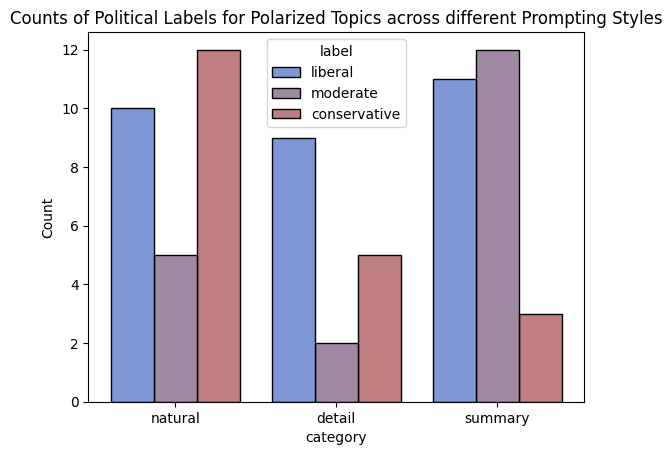

In [ ]:
# Graph for all polarized topics
label_colors = {'liberal':'#5175ca','conservative':'#aa5456','moderate':'#826289'}
palette = [label_colors[label] for label in combined_df['label'].unique()] # one label color per label for each type of label
sns.set_palette(palette)

sns.histplot(data=polarized_df,x='category',hue="label", multiple='dodge',shrink=.8).set(title="Counts of Political Labels for Polarized Topics across different Prompting Styles")

Reference: https://stackoverflow.com/questions/23482668/sorting-by-a-custom-list-in-pandas

Now, let's repeat with international topics!

In [ ]:
mask = combined_df['international'] == 1
international_df = pd.DataFrame(combined_df[mask])

In [ ]:
international_df['label'].value_counts()

conservative    13
liberal         12
moderate         8
Name: label, dtype: int64

In [ ]:
# Sort the labels so they can be converted properly to palettes and stay in the right order
# We also have to do it for our category

# Set preferred order
sorter = ['liberal', 'moderate', 'conservative']
category_sorter = ['natural', 'sumamry', 'detail']

# Create a dictionary mapping
sorterIndex = dict(zip(sorter, range(3)))
categoryIndex = dict(zip(category_sorter, range(3)))

# Apply sorting
international_df["sorter_rank"] = international_df["label"].map(sorterIndex)
international_df["category_sorter_rank"] = international_df["category"].map(categoryIndex)

international_df.sort_values(["category_sorter_rank", "sorter_rank",], ascending= True, inplace= True)

In [ ]:
international_df.head()

,label,contentious,international,category,sorter_rank,category_sorter_rank
32,liberal,1,1,natural,0,0.0
33,liberal,1,1,natural,0,0.0
38,liberal,1,1,natural,0,0.0
43,liberal,1,1,natural,0,0.0
44,moderate,1,1,natural,1,0.0


[Text(0.5, 1.0, 'Counts of Political Labels for International Topics across different Prompting Styles')]

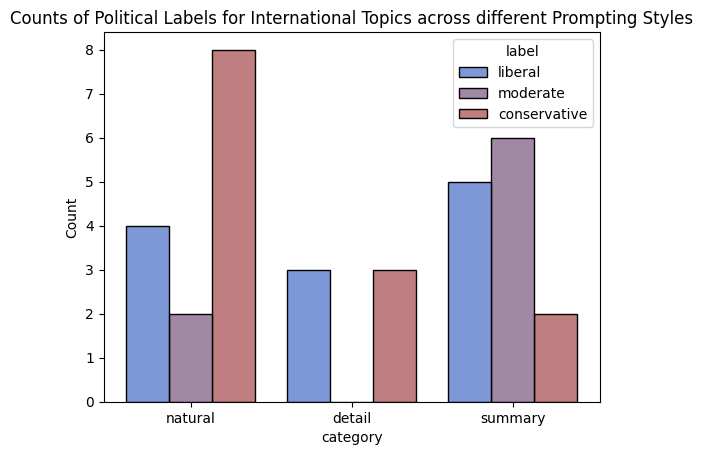

In [ ]:
# Graph for all international topics
label_colors = {'liberal':'#5175ca','conservative':'#aa5456','moderate':'#826289'}
palette = [label_colors[label] for label in combined_df['label'].unique()] # one label color per label for each type of label
sns.set_palette(palette)

sns.histplot(data=international_df,x='category',hue="label", multiple='dodge',shrink=.8).set(title="Counts of Political Labels for International Topics across different Prompting Styles")

Next, we want to show the Number (y) of classified (liberal, moderate, conservative) ChatGPT responses from different prompt categories (x) on non-polarizing topics across US focused and International news.

In [ ]:
mask = combined_df['contentious'] == 0
nonpolarized_df = pd.DataFrame(combined_df[mask])

In [ ]:
# Sort the labels so they can be converted properly to palettes and stay in the right order
# We also have to do it for our category

# Set preferred order
sorter = ['liberal', 'moderate', 'conservative']
category_sorter = ['natural', 'sumamry', 'detail']

# Create a dictionary mapping
sorterIndex = dict(zip(sorter, range(3)))
categoryIndex = dict(zip(category_sorter, range(3)))

# Apply sorting
nonpolarized_df["sorter_rank"] = nonpolarized_df["label"].map(sorterIndex)
nonpolarized_df["category_sorter_rank"] = nonpolarized_df["category"].map(categoryIndex)

nonpolarized_df.sort_values(["category_sorter_rank", "sorter_rank",], ascending= True, inplace= True)

[Text(0.5, 1.0, 'Counts of Political Labels for Non-Polarized Topics across different Prompting Styles')]

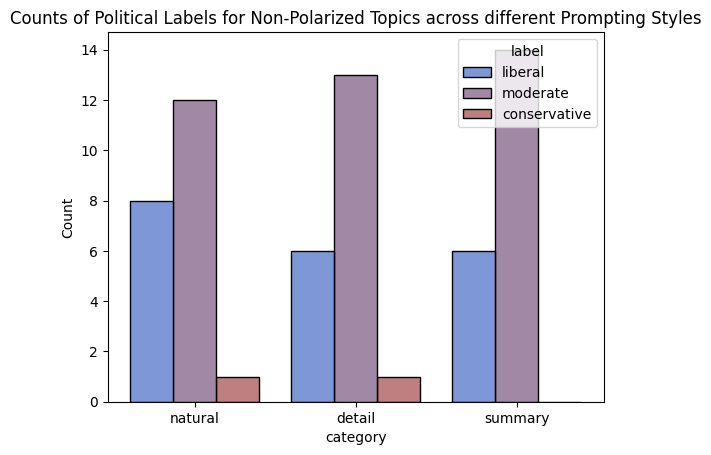

In [ ]:
# Graph for all international topics
label_colors = {'liberal':'#5175ca','conservative':'#aa5456','moderate':'#826289'}
palette = [label_colors[label] for label in combined_df['label'].unique()] # one label color per label for each type of label
sns.set_palette(palette)

sns.histplot(data=nonpolarized_df,x='category',hue="label", multiple='dodge',shrink=.8).set(title="Counts of Political Labels for Non-Polarized Topics across different Prompting Styles")

Finally, let's show Number (y) of classified (liberal, moderate, conservative) ChatGPT responses from different prompt categories (x) on polarized topics across US focused news

In [ ]:
mask = polarized_df['international'] == 0
polarized_us_df = pd.DataFrame(polarized_df[mask])

In [ ]:
# Sort the labels so they can be converted properly to palettes and stay in the right order
# We also have to do it for our category

# Set preferred order
sorter = ['liberal', 'moderate', 'conservative']
category_sorter = ['natural', 'sumamry', 'detail']

# Create a dictionary mapping
sorterIndex = dict(zip(sorter, range(3)))
categoryIndex = dict(zip(category_sorter, range(3)))

# Apply sorting
polarized_us_df["sorter_rank"] = polarized_us_df["label"].map(sorterIndex)
polarized_us_df["category_sorter_rank"] = polarized_us_df["category"].map(categoryIndex)

polarized_us_df.sort_values(["category_sorter_rank", "sorter_rank",], ascending= True, inplace= True)

[Text(0.5, 1.0, 'Counts of Political Labels for US-Focused Topics across different Prompting Styles')]

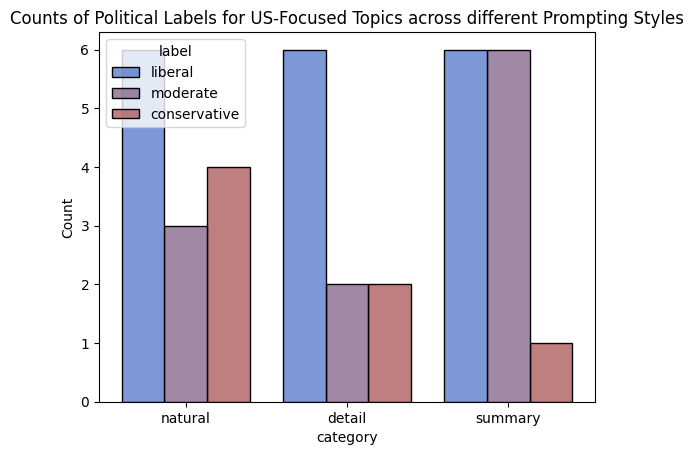

In [ ]:
# Graph for all international topics
label_colors = {'liberal':'#5175ca','conservative':'#aa5456','moderate':'#826289'}
palette = [label_colors[label] for label in combined_df['label'].unique()] # one label color per label for each type of label
sns.set_palette(palette)

sns.histplot(data=polarized_us_df,x='category',hue="label", multiple='dodge',shrink=.8).set(title="Counts of Political Labels for US-Focused Topics across different Prompting Styles")